# Basics of plotting (matplotlibを用いた描画の基本)


To get this ipynb file, click [here](simplePlottingEx.ipynb)

## plotの基本

 - プロットライブラリmatplotlibの中のpyplotを利用
 - x,yの値をそれぞれリスト（１次元配列）として生成
 - pyplotのplot関数の引数にx,yを与える
 - 画面への出力関数showを実行

【注】

最初にpyplotの関数利用を体験し、次にオブジェクト指向型の使い方を説明する。それぞれ異なった関数名があるので混乱しやすいが、このような複数のスタイルがあることを認識していれば慣れやすいと思う。

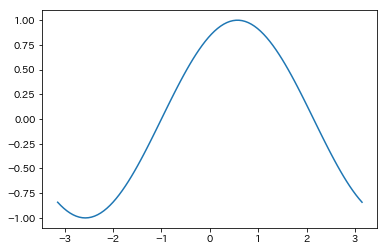

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-np.pi, np.pi, 100) # [-pi, pi]を100等分した値を配列（リスト）に
y = np.sin(x + 1.0)                 # yもxと同じ要素数のリスト (numpyの数学関数はリストを引数にすることができる)
plt.plot(x, y)                      # xとyともリスト
plt.show()

## 装飾をつける



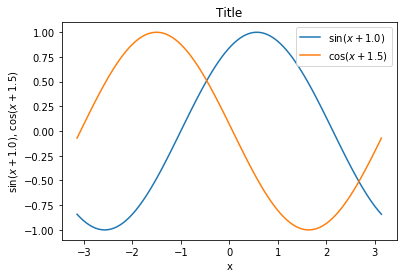

In [28]:
y1 = np.cos(x + 1.5)
plt.plot(x,y)
plt.plot(x,y1)
plt.xlabel("x") # 単純な軸ラベル
plt.ylabel("$\\sin (x+1.0)$, $\\cos (x+1.5)$") # 数式をLaTeX文法で入れる
plt.title("Title")
plt.legend(["$\\sin (x+1.0)$", "$\\cos (x+1.5)$"]) # 凡例はリストあるいはタプル（定数のリスト）で与える
plt.show()

2価関数的なplotも可能　→　軌跡描画などに使用

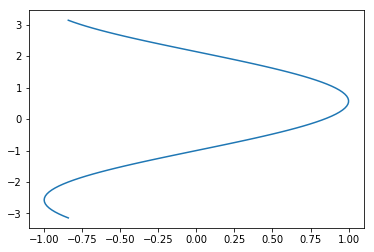

In [30]:
plt.plot(y,x)
plt.show()

## オブジェクト指向的な書き方


- fig = plt.figure()で全体のオブジェクトを生成する。（大きさも設定）
- fig.subplot()関数を利用して、figに個々のプロットオブジェクトを生成する。
- add_subplotメソッドによりプロットオブジェクトを生成する。(一つの座標軸なので、axisと呼ぶことが多い。）
- プロットオブジェクトにいろいろなメソッドがある。(pltのメソッドと名称や引数定義が異なる。）

こちらのほうが自由度が多いので推奨する。（Web上の参考事例では両者が混ざっていることもあるのでわかりにくい。）

（注）
 - 最後にplt.show()を実行しなくても描画されるがその理由はわからない。（画面に描画する必要はなく、内容をファイルに書き出す場合もあるので、画面に出す場合はshow()を使えとマニュアルに書いてある。）
 - ファイルに書きだす場合はsavefig("ファイル名")を使う。ファイル名の拡張子をみて、多くの場合、自動的に画像フォーマットが決められる。

下の例のようにadd_subplotで追加する方法以外に
```python
fig, axs = plt.subplots((2,2), figsize=(5,5))
```
と、複数のsubplotを作ってしまうこともできる。この場合、axsは２行２列のaxisの配列になる。


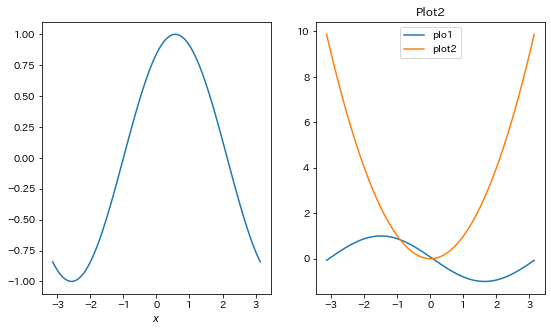

In [1]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(9,5)) # オプションは省略可、ほかにもオプションはある
x = np.linspace(-np.pi, np.pi, 100) # [-pi, pi]を100等分した値を配列（リスト）に
y = np.sin(x + 1.0)                 # yもxと同じ要素数のリスト
y1 = np.cos(x + 1.5)

ax1 = fig.add_subplot(1,2,1)  # 1行2列の1番目
ax1.plot(x, y)
ax1.set_xlabel("$x$") # plotオブジェクトに対していろいろなメソッドがある。

ax2 = fig.add_subplot(1,2,2)
ax2.plot(x,y1)
ax2.plot(x, x**2)
ax2.set_title("Plot2")
ax2.legend(("plo1", "plot2"))

# plt.savefig("test.pdf") # ファイルに書き出す

pandasのDataFrameの複数のデータのプロットを一つの図に入れ込むときは、上記のようにaxisを作っておいて、DataFrameのplotのオプションにaxにプロットオブジェクトを指定する。

# A simplest inline gui： using "interact" in ipywidgets

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

def my_plot(amp=1.0, omega=1.0, phase=0.0):  # 振幅、各振動数、位相シフトを引数とするsinプロット
    domain=[-np.pi, np.pi]
    x = np.linspace(domain[0], domain[1], 100)
    y  = amp * np.sin(omega * x + phase)
    plt.plot(x, y)
    plt.show()

interact(my_plot, amp=(0.1, 4.0, 0.1), omega=(0.1, 4.0, 0.1), phase=(-np.pi, np.pi, 0.1))
# widgetの種類を特定せず(最小,最大, 初期値)のみを与えた場合は、スライダになる。

interactive(children=(FloatSlider(value=1.0, description='amp', max=4.0, min=0.1), FloatSlider(value=1.0, description='omega', max=4.0, min=0.1), FloatSlider(value=0.0, description='phase', max=3.141592653589793, min=-3.141592653589793), Output()), _dom_classes=('widget-interact',))

<function __main__.my_plot>

# Using "interact_manual"

Plotting starts after pushing "Run Interact".


In [25]:
from ipywidgets import interact_manual
interact_manual(my_plot, amp=(0.1, 4.0, 0.1), omega=(0.1, 4.0, 0.1), phase=(-np.pi, np.pi, 0.1))

interactive(children=(FloatSlider(value=1.0, description='amp', max=4.0, min=0.1), FloatSlider(value=1.0, description='omega', max=4.0, min=0.1), FloatSlider(value=0.0, description='phase', max=3.141592653589793, min=-3.141592653589793), Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widget-interact',))

<function __main__.my_plot>